<a href="https://colab.research.google.com/github/CuongPhan2k4/LTPY/blob/main/Lab4p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

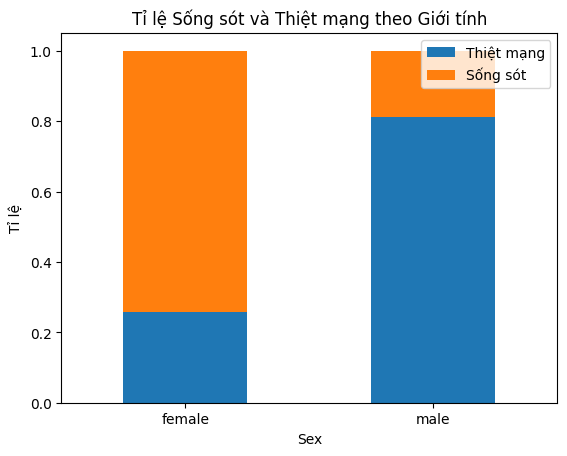

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic_disaster.csv')

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

survival_by_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

survival_by_sex.plot(kind='bar', stacked=True)
plt.title('Tỉ lệ Sống sót và Thiệt mạng theo Giới tính')
plt.ylabel('Tỉ lệ')
plt.xticks(rotation=0)
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()

print(survival_by_sex)

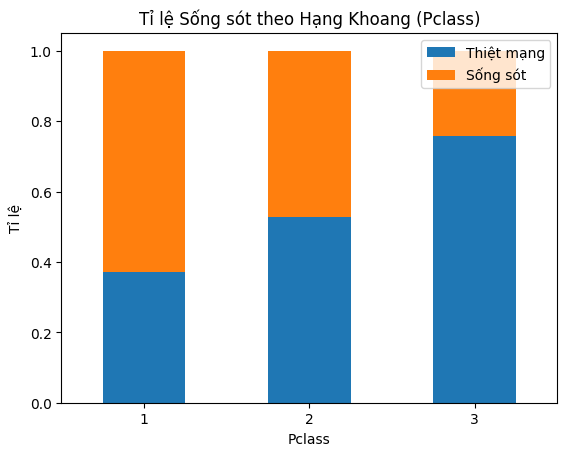

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [4]:
survival_by_pclass = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
survival_by_pclass.plot(kind='bar', stacked=True)
plt.title('Tỉ lệ Sống sót theo Hạng Khoang (Pclass)')
plt.ylabel('Tỉ lệ')
plt.xticks(rotation=0)
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()

print(survival_by_pclass)

<ipython-input-5-5e9550228161>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_sex = df.groupby(['AgeGroup', 'Sex'])['Survived'].value_counts(normalize=True).unstack()


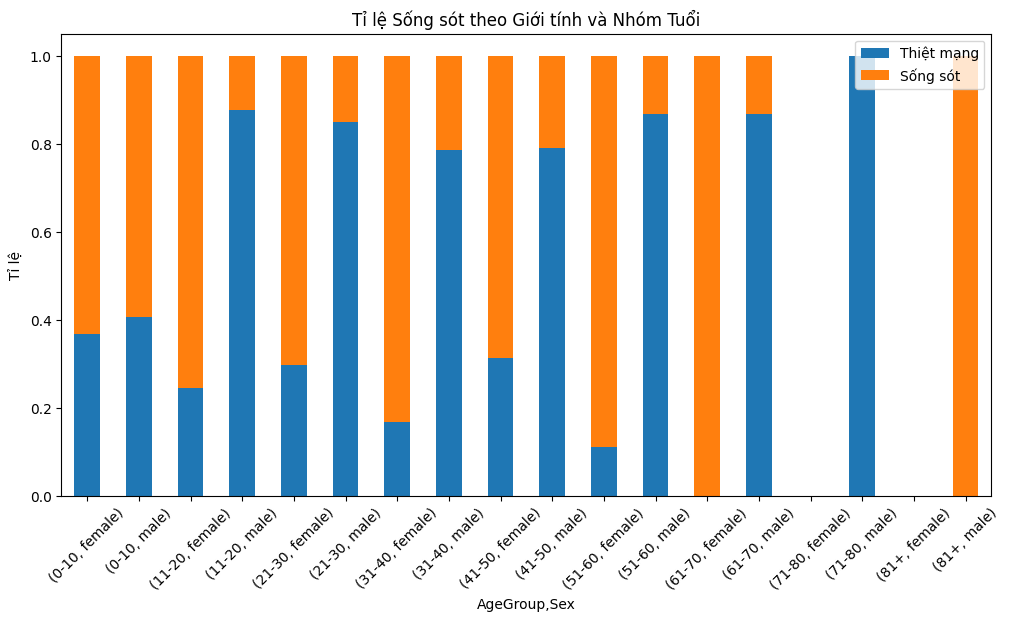

Survived                0         1
AgeGroup Sex                       
0-10     female  0.366667  0.633333
         male    0.406250  0.593750
11-20    female  0.244444  0.755556
         male    0.877193  0.122807
21-30    female  0.296000  0.704000
         male    0.849265  0.150735
31-40    female  0.166667  0.833333
         male    0.785047  0.214953
41-50    female  0.312500  0.687500
         male    0.789474  0.210526
51-60    female  0.111111  0.888889
         male    0.866667  0.133333
61-70    female  0.000000  1.000000
         male    0.866667  0.133333
71-80    female  0.000000  0.000000
         male    1.000000  0.000000
81+      female  0.000000  0.000000
         male    0.000000  1.000000


In [5]:

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
survival_by_age_sex = df.groupby(['AgeGroup', 'Sex'])['Survived'].value_counts(normalize=True).unstack()
survival_by_age_sex.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Tỉ lệ Sống sót theo Giới tính và Nhóm Tuổi')
plt.ylabel('Tỉ lệ')
plt.xticks(rotation=45)
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()
print(survival_by_age_sex)

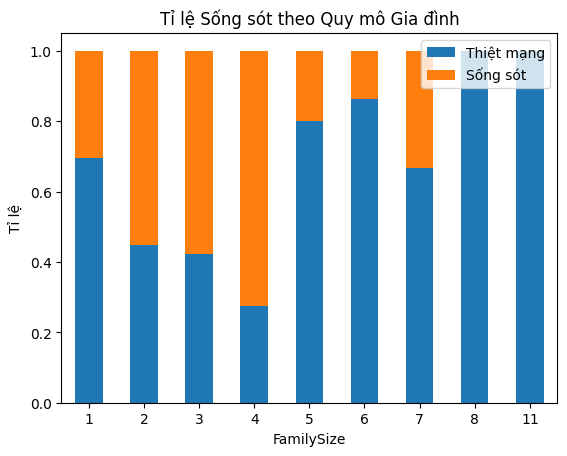

Survived           0         1
FamilySize                    
1           0.696462  0.303538
2           0.447205  0.552795
3           0.421569  0.578431
4           0.275862  0.724138
5           0.800000  0.200000
6           0.863636  0.136364
7           0.666667  0.333333
8           1.000000       NaN
11          1.000000       NaN


In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

survival_by_family = df.groupby('FamilySize')['Survived'].value_counts(normalize=True).unstack()
survival_by_family.plot(kind='bar', stacked=True)
plt.title('Tỉ lệ Sống sót theo Quy mô Gia đình')
plt.ylabel('Tỉ lệ')
plt.xticks(rotation=0)
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()

print(survival_by_family)

<ipython-input-7-0a9f43102e86>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby('FareBin')['Survived'].value_counts(normalize=True).unstack()


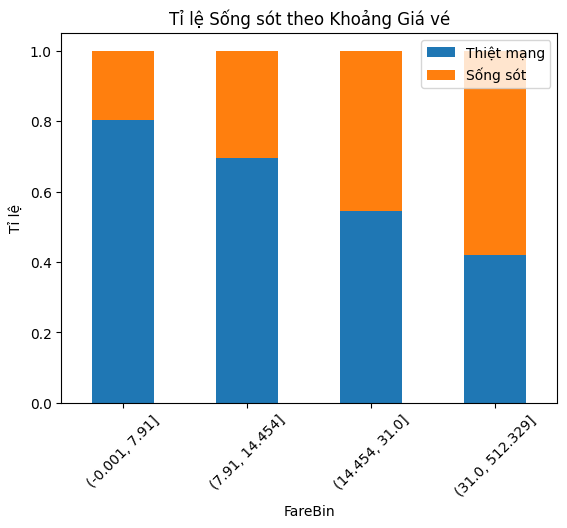

Survived                0         1
FareBin                            
(-0.001, 7.91]   0.802691  0.197309
(7.91, 14.454]   0.696429  0.303571
(14.454, 31.0]   0.545045  0.454955
(31.0, 512.329]  0.418919  0.581081


In [7]:
df['FareBin'] = pd.qcut(df['Fare'], 4)
survival_by_fare = df.groupby('FareBin')['Survived'].value_counts(normalize=True).unstack()

survival_by_fare.plot(kind='bar', stacked = True)
plt.title('Tỉ lệ Sống sót theo Khoảng Giá vé')
plt.ylabel('Tỉ lệ')
plt.xticks(rotation=45)
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()

print(survival_by_fare)

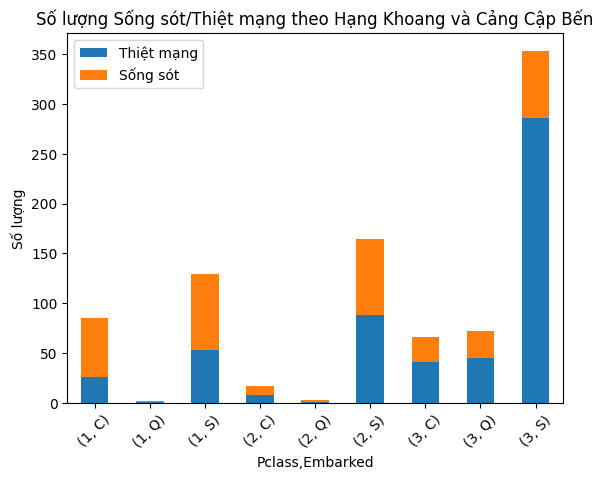

Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  76
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67


In [9]:
survival_by_pclass_embarked = df.groupby(['Pclass', 'Embarked'])['Survived'].value_counts().unstack()
survival_by_pclass_embarked.plot(kind='bar', stacked=True)
plt.title('Số lượng Sống sót/Thiệt mạng theo Hạng Khoang và Cảng Cập Bến')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()
print(survival_by_pclass_embarked)